In [76]:
from helper import *
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LogisticRegression

main = pd.read_pickle("../Data/main_1.df")

FEATURES = ["horse_record", "trainer_record", "jockey_record", 
            "win_percent", "best_win_percent", "horse_rating_rel",
            "new_horse", "surface_record",
            #"horse_record_rel", "jockey_record_rel", "trainer_record_rel", "place_odds"
            ### MEDIOCRE ###
            #"best_distance_time", "best_going_record", 
            "best_horse_record", "last_race_result",
            "best_jockey_record", "best_trainer_record",
            
            "draw", "horse_wins", "declared_weight_rel", "actual_weight_rel",
            "last_refined_score_rel", "last_raw_score_rel",
            "mean_raw_score_rel", "mean_ref_score_rel","normal_avg_distance_time","going_type_record", 
            
            ### USELESS ###
            "actual_weight", 
            
            ### ACTUALLY USELESS ###
            #"declared_weight","avg_distance_time","start_speed","jockey_wins", "number_of_races", 
            #"days_since_last_race",
    ]
TARGET = "won"

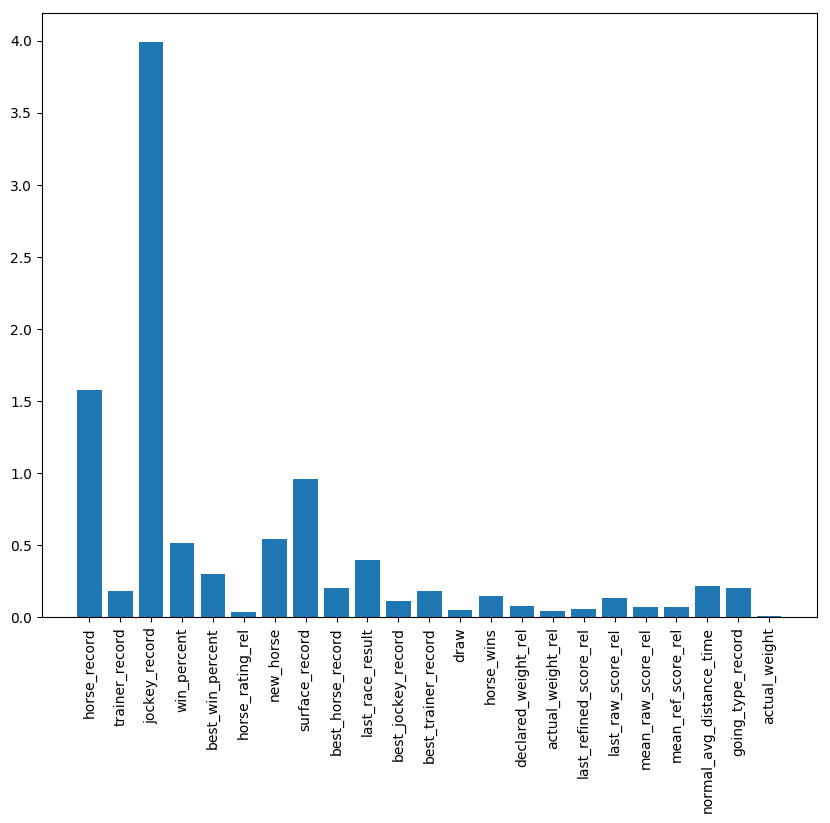

Accuracy: 0.228 +/- 0.014


In [77]:
accs = []
imps = []
for training, testing in getCrossVal(main, 5):
    model = LogisticRegression(max_iter=5000)
    X_train = training[FEATURES]
    y_train = training[TARGET]
    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    model.fit(X_train, y_train)
    pred_probs = pd.Series([i for _, i in model.predict_proba(X_test)])

    imps.append(model.coef_[0])
    
    accs.append(winnerEval(pred_probs, y_test, testing))
    #print("Accuracy: {}".format(winnerEval(pred_probs, y_test, testing)))
    
avgImp = [np.abs(np.mean([imps[i][j] for i in range(len(imps))])) for j in range(len(imps[0]))]
ids = [x for x in range(len(FEATURES))]

plt.figure(figsize=(10,8), dpi=100)
plt.bar(ids, avgImp)
plt.xticks(ids, FEATURES, rotation=90)
plt.show()
print("Accuracy: {:.3f} +/- {:.3f}".format(np.mean(accs), np.std(accs)))

In [ ]:
for i in main.columns:
    print(i)